In [5]:
!wget https://raw.githubusercontent.com/rpryzant/causal-bert-pytorch/master/CausalBert.py
!wget https://raw.githubusercontent.com/rpryzant/causal-bert-pytorch/master/testdata.csv
!pip install transformers

--2023-04-19 05:58:15--  https://raw.githubusercontent.com/rpryzant/causal-bert-pytorch/master/CausalBert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11338 (11K) [text/plain]
Saving to: ‘CausalBert.py’

CausalBert.py       100%[===================>]  11.07K  --.-KB/s    in 0s      

2023-04-19 05:58:16 (116 MB/s) - ‘CausalBert.py’ saved [11338/11338]

--2023-04-19 05:58:16--  https://raw.githubusercontent.com/rpryzant/causal-bert-pytorch/master/testdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7173870 (6.8M) [tex

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import networkx as nx

from CausalBert import CausalBert

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [17]:
np.random.seed(18)

# Causality vs NLP (PyCon DE & PyData Berlin 2023 )

## DGP 1

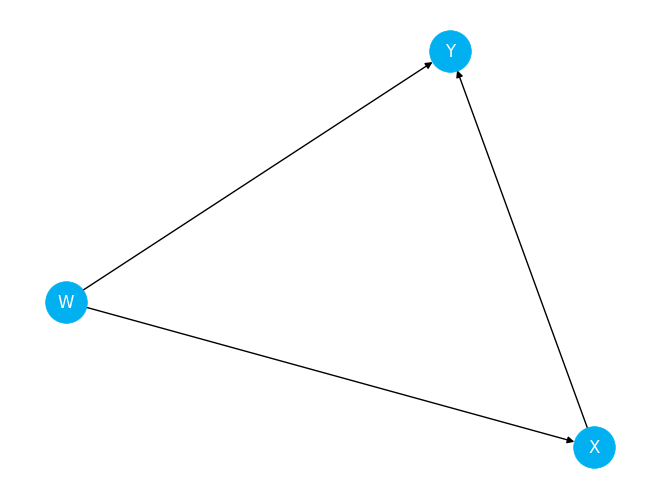

In [14]:
dag_1 = nx.DiGraph()

dag_1.add_edges_from(
    [
        ('X', 'Y'),
        ('W', 'X'),
        ('W', 'Y')
    ]
)

nx.draw(
    dag_1, 
    with_labels=True, 
    node_size=900,
    font_color='white', 
    node_color=COLORS[0]
)

In [18]:
SAMPLE_SIZE = 1000

w = np.random.normal(0, 1, SAMPLE_SIZE)
x = w + 0.5*np.random.normal(0, 1, SAMPLE_SIZE)
y = 5*x + 2*w + 0.5*np.random.normal(0, 1, SAMPLE_SIZE)

feats = np.stack([x, w]).T

In [23]:
# Statsmodel models require us to add constant
feats = sm.add_constant(feats)

# Instantiate the model and fit it
model = sm.OLS(y, feats)
fitted_model = model.fit()

# Print results summary
print(fitted_model.summary(xname=['const', 'x', 'w']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.149e+05
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:12:57   Log-Likelihood:                -737.34
No. Observations:                1000   AIC:                             1481.
Df Residuals:                     997   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0065      0.016     -0.403      0.6

## DGP 2

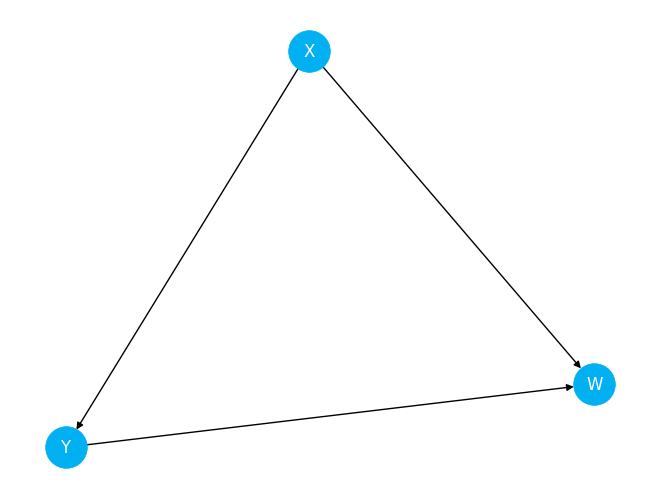

In [24]:
dag_2 = nx.DiGraph()

dag_2.add_edges_from(
    [
        ('X', 'Y'),
        ('X', 'W'),
        ('Y', 'W')
    ]
)

nx.draw(
    dag_2, 
    with_labels=True, 
    node_size=900,
    font_color='white', 
    node_color=COLORS[0]
)

In [36]:
x = np.random.normal(0, 1, SAMPLE_SIZE)
y = 5*x + 0.5*np.random.normal(0, 1, SAMPLE_SIZE)
w = 5*x + 2*y + 0.2*np.random.normal(0, 1, SAMPLE_SIZE)

feats = np.stack([x, w]).T

In [37]:
# Statsmodel models require us to add constant
feats = sm.add_constant(feats)

# Instantiate the model and fit it
model = sm.OLS(y, feats)
fitted_model = model.fit()

# Print results summary
print(fitted_model.summary(xname=['const', 'x', 'w']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.233e+06
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:16:51   Log-Likelihood:                 891.11
No. Observations:                1000   AIC:                            -1776.
Df Residuals:                     997   BIC:                            -1761.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.003     -0.110      0.9